In [43]:
gecost=read.csv("../datasets/gasgal-vs-eleckwh.csv", header = TRUE, sep = ",")
print(head(gecost, 5))

  gas.per.gallon elec.per.kwh
1          1.592        0.091
2          1.672        0.091
3          1.766        0.091
4          1.833        0.091
5          2.009        0.093


In [44]:
lmodel=lm(elec.per.kwh~gas.per.gallon, gecost)
lmodel


Call:
lm(formula = elec.per.kwh ~ gas.per.gallon, data = gecost)

Coefficients:
   (Intercept)  gas.per.gallon  
       0.07605         0.01541  


In [45]:
pc=prcomp(gecost)
pc

Standard deviations (1, .., p=2):
[1] 0.65108319 0.00927744

Rotation (n x k) = (2 x 2):
                      PC1         PC2
gas.per.gallon 0.99988131 -0.01540671
elec.per.kwh   0.01540671  0.99988131

In [48]:
PC1=pc$rotation[,1]
PC2=pc$rotation[,2]
slope1 = as.numeric(PC1[2]/PC1[1])
slope2 = as.numeric(PC2[2]/PC2[1])
c(slope1,slope2)

[1]   0.01540854 -64.89908967

In [51]:
means=as.numeric(colMeans(gecost))
xc=means[1]; yc=means[2]
means

[1] 2.9120833 0.1209167

In [68]:
intercept=yc - slope1 * xc
intercept 

[1] 0.07604572

In [62]:
PC1+means

gas.per.gallon   elec.per.kwh 
     3.9119646      0.1363234

In [115]:
library(graphics)

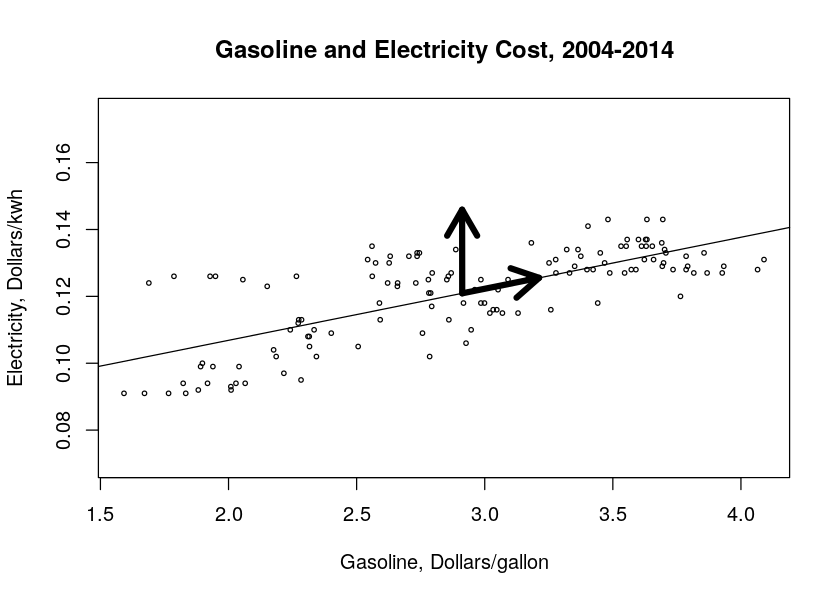

In [72]:
options(repr.plot.width=7, repr.plot.height=5)
#pdf("gas-elect-pca.pdf",width=7,height=5)
plot(gecost$gas.per.gallon, gecost$elec.per.kwh, cex=0.5, 
    main="Gasoline and Electricity Cost, 2004-2014",
    xlab="Gasoline, Dollars/gallon",
    ylab="Electricity, Dollars/kwh", ylim=c(0.07,.175))
arrows(xc, yc, xc+PC1[1]*.3, yc+PC1[2]*.3, lwd=5)
arrows(xc, yc, xc+PC2[1]*.025, yc+(PC2[2]*.025), lwd=5)
abline(intercept, slope1)
#dev.off()

# Image Compression Example

In [ ]:
#install.packages("jpeg")

In [1]:
library(jpeg)

## Read the JPG file

In [2]:
romeo=readJPEG("../pix/my-bone.jpg")

In [3]:
dim(romeo)

[1] 2080 1536    3

## Convert into a gray-scale image by averaging method

In [4]:
red=romeo[,,1]
green=romeo[,,2]
blue=romeo[,,3]

gray=(red+blue+green)/3.

In [5]:
maxmin=function(X){
    c(max(X),min(X))
}
c(maxmin(red),maxmin(green),maxmin(blue))

[1] 1 0 1 0 1 0

## For convenience we will rotate the image by 90 degrees

In [6]:
#rotate90 = function(x) { t(apply(x, 2, rev))}
gray = t(apply(gray, 2, rev))

In [218]:
#writeJPEG(pic,"somepicture.jpg")

## Display original image on screen

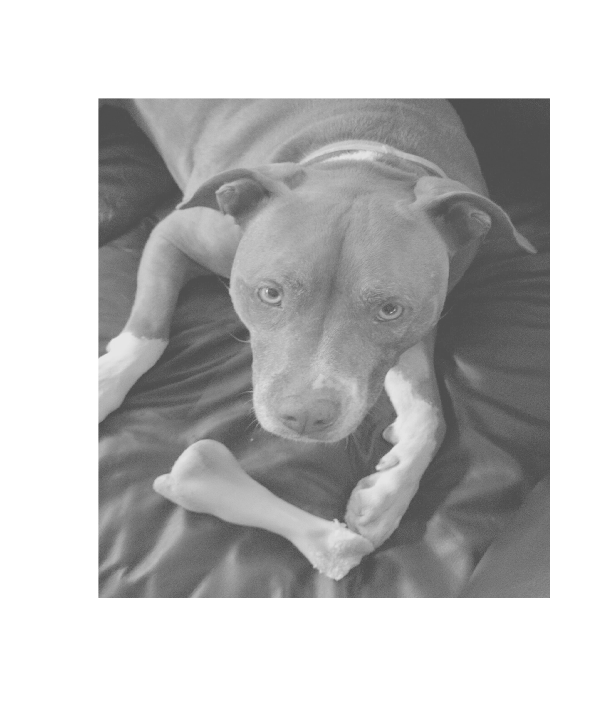

In [11]:
options(repr.plot.width=5, repr.plot.height=6)
#png("romeo-grayscale.png")
image(gray, col=gray.colors(256),
     #xlab="Original Image", 
      axes=FALSE
     )
#dev.off()

## Find SVD of Entire Image

## $$ SVD = U S V^\text{T} $$

In [16]:
gray.svd=svd(gray)

In [17]:
S=gray.svd$d
U=gray.svd$u
V=gray.svd$v

In [18]:
dim(U)

[1] 1536 1536

In [19]:
dim(V)

[1] 2080 1536

In [20]:
l = dim(gray)[1]
w = dim(gray)[2]
c(l,w)

[1] 1536 2080

In [23]:
w==dim(V)[1]

[1] TRUE

In [32]:
ShowImageComponents = function(n, S, U, V){
    total=0
    w=dim(V)[1]; v=dim(V)[2]
    for (j in 1:n){ 
       total = total +  S[j] * ((U[,j]) %o% t(V)[j,])
    }
    pic=matrix(total)
    dim(pic)=c(l,w)
    pic
    }

In [39]:
1536*2080

[1] 3194880

In [40]:
200*1536 + 100

[1] 307300

In [33]:
options(repr.plot.width=5, repr.plot.height=6)

ShowRomeo = function(n){
    I= ShowImageComponents(n, S, U, V)
    image(I, col=gray.colors(256),
      #xlab=paste(n, "components"), 
      axes=FALSE)
}

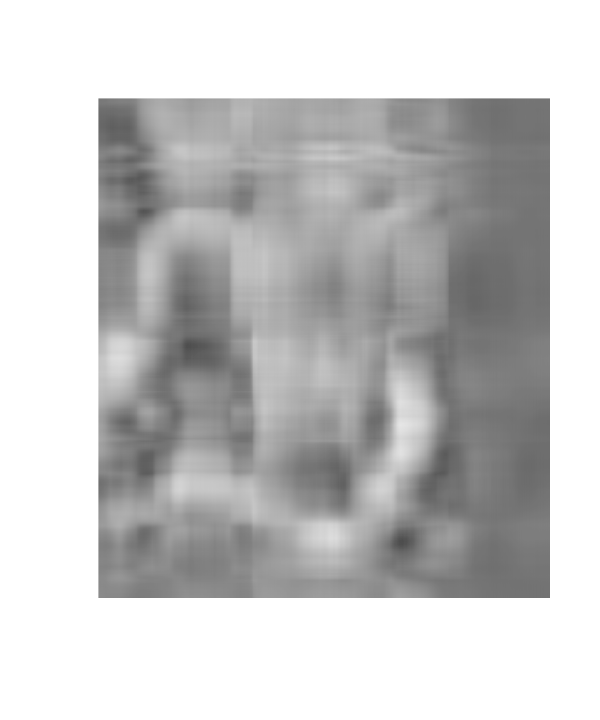

In [34]:
ShowRomeo(5)

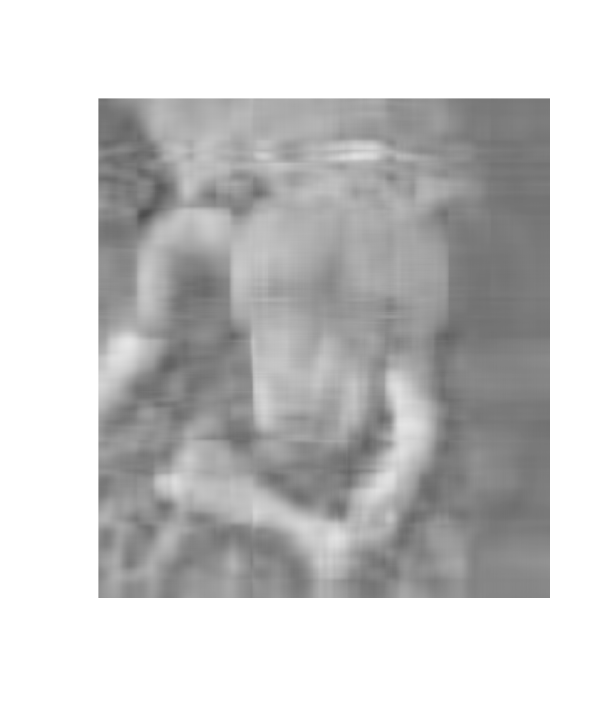

In [35]:
ShowRomeo(10)                     

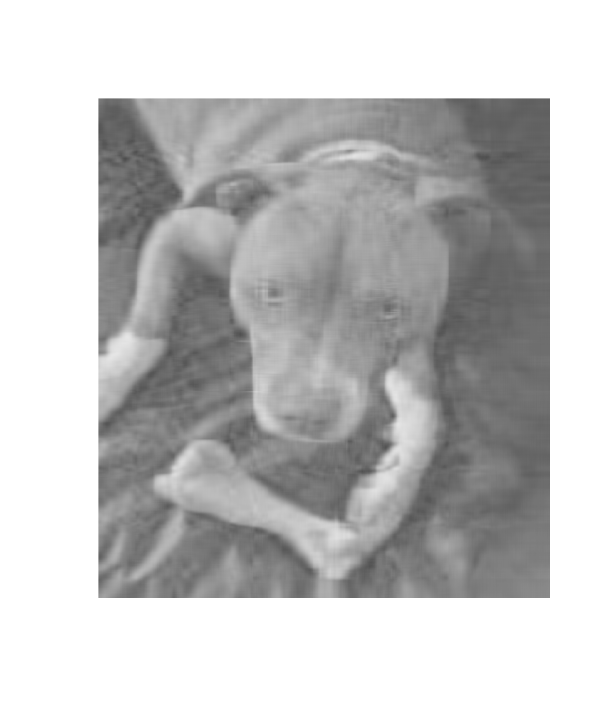

In [272]:
ShowMeRomeo(25)                       

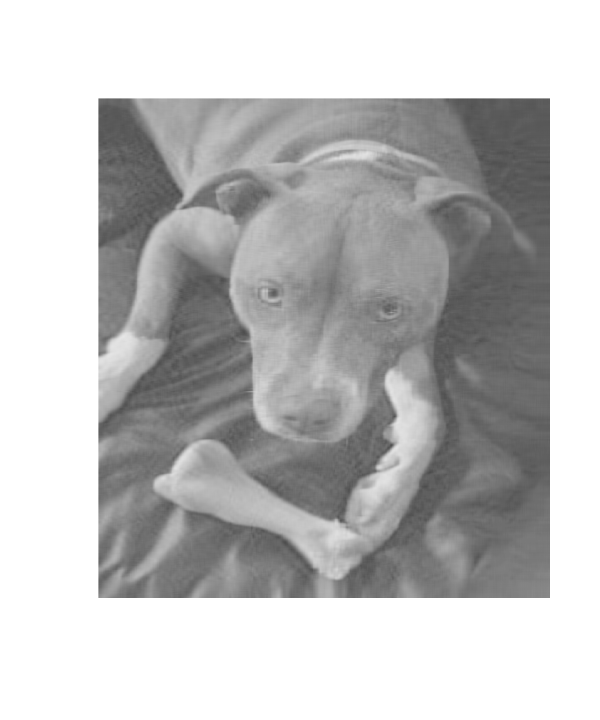

In [273]:
ShowMeRomeo(50)                   

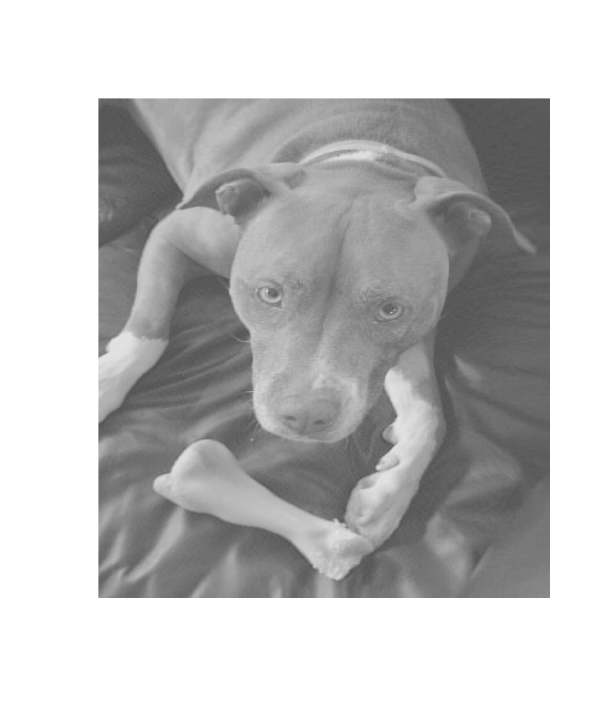

In [274]:
ShowMeRomeo(100)

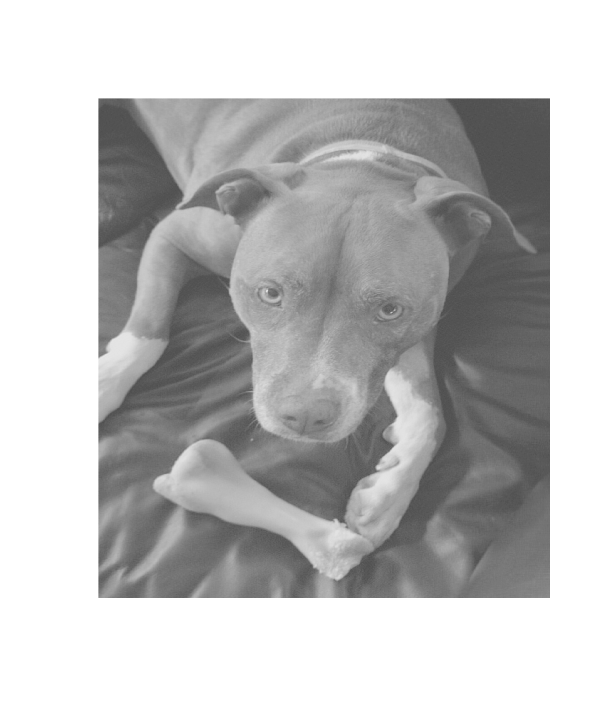

In [275]:
ShowMeRomeo(200)

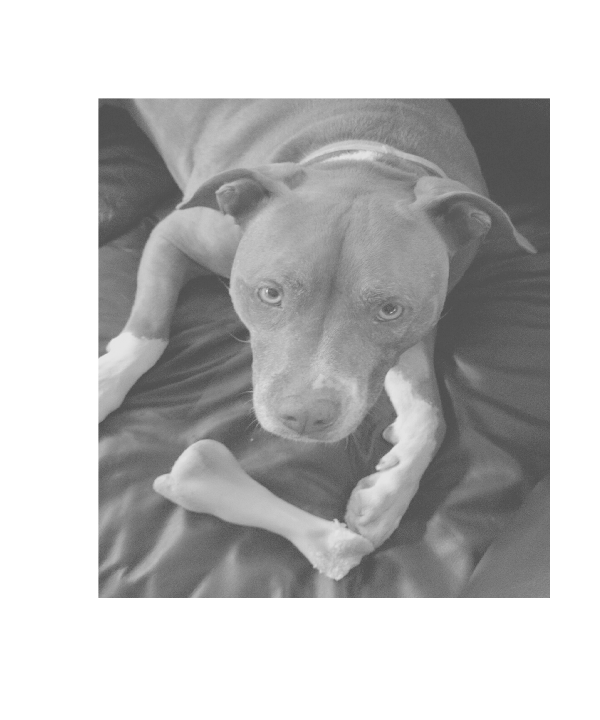

In [276]:
ShowMeRomeo(1000)

In [277]:
png("Romeo10.png")
ShowMeRomeo(10) 
dev.off()

png 
  2

In [278]:
png("Romeo25.png")
ShowMeRomeo(25) 
dev.off()

png 
  2

In [279]:
png("Romeo50.png")
ShowMeRomeo(50) 
dev.off()

png 
  2

In [280]:
png("Romeo100.png")
ShowMeRomeo(100) 
dev.off()

png 
  2

In [281]:
png("Romeo200.png")
ShowMeRomeo(200) 
dev.off()

png 
  2

In [282]:
png("Romeo1000.png")
ShowMeRomeo(1000) 
dev.off()

png 
  2